# Exploration

Ideas:
- model predicting how median sale prices will rise or fall based on census data and pulled permits data
- using that model to update my last capstone model on predicting individual house prices
- flask app to input data and predict home value
- flask app to input data and predict median home value increase or decrease

In [359]:
import json
import urllib.request
import sqlite3
url = 'https://data.sanantonio.gov/api/3/action/datastore_search?resource_id=c21106f9-3ef5-4f3a-8604-f992b4db7512&limit=40000'  
fileobj = urllib.request.urlopen(url)
response_dict = json.loads(fileobj.read())
records = response_dict['result']['records']
len(records)

32000

In [335]:
import matplotlib.pyplot as plt

In [174]:
type(records[0])

dict

In [171]:
newurl = 'https://data.sanantonio.gov/api/3/action/datastore_search_sql?sql=SELECT * from "c21106f9-3ef5-4f3a-8604-f992b4db7512" WHERE "work type" LIKE 'new''  
fileobj = urllib.request.urlopen(newurl)
response_dict = json.loads(fileobj.read())
records = response_dict['result']['records']


SyntaxError: invalid syntax (<ipython-input-171-ec32692e1555>, line 1)

In [238]:
records[0]

{'DATE ISSUED': '2021-01-05T00:00:00',
 'DATE SUBMITTED': '2020-04-27T00:00:00',
 'Y_COORD': None,
 'PRIMARY CONTACT': 'LEE MANGUM',
 'CD': None,
 'PERMIT NAME': 'DUKE 281 TRACK',
 'X_COORD': None,
 'PERMIT TYPE': 'COMMERCIAL SINGLE BUILDING',
 'AREA (SF)': '1',
 'PERMIT #': '2604214',
 'LOCATION': '21915 N US HWY 281',
 'ADDRESS': ' ',
 'DECLARED VALUATION': '4200000',
 '_id': 1,
 'WORK TYPE': 'NEW',
 'NCD': None,
 'HD': None}

In [360]:
records_df = pd.DataFrame(records)

In [361]:
records_df = records_df.rename(columns=lambda x: x.replace(' ','_'))

In [362]:
records_df.DATE_ISSUED = pd.to_datetime(records_df.DATE_ISSUED)
records_df.DATE_SUBMITTED = pd.to_datetime(records_df.DATE_SUBMITTED)

In [363]:
records_df.DATE_SUBMITTED[0]

Timestamp('2020-04-27 00:00:00')

(array(18013.), array(18739.))

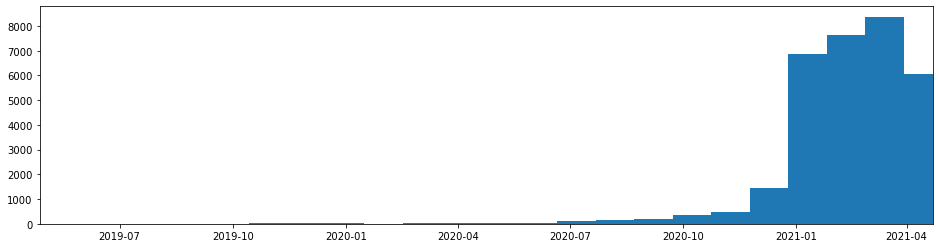

In [367]:
fig,ax = plt.subplots(figsize=(16,4))
ax.hist(records_df.DATE_SUBMITTED,bins=200)
ax.set_xlim('2019-04-27 00:00:00','2021-04-22 00:00:00')

In [365]:
records_df[records_df['WORK_TYPE'] == 'NEW'].PERMIT_TYPE.unique()

array(['COMMERCIAL SINGLE BUILDING', 'SIGN PERMIT APPLICATION',
       'ELECTRICAL PERMIT', 'PLUMBING PERMIT APPLICATION',
       'RESIDENTIAL BLDG APPLICATION', 'MECHANICAL PERMIT APPLICATION',
       'ETJMPA CERT OF COMPATIBILITY', 'FIRE SYSTEMS PERMIT',
       'PLUMB LIMITED SVC AND REPAIR', 'STORAGE TANKS PERMIT',
       'MISC REVIEW', 'MISC NO REVIEW', 'TREE PERMIT'], dtype=object)

In [301]:
con = sqlite3.connect("data/records_sql.db")
cursor = con.cursor()

In [302]:
records_df.to_sql("records_sql", con, if_exists="replace")

In [312]:
def get_new():
    cursor.execute("SELECT * FROM records_sql WHERE WORK_TYPE IS 'NEW'")
    new = cursor.fetchall()
    return new

In [321]:
pd.DataFrame(get_new())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,2021-01-05T00:00:00,2020-04-27T00:00:00,None,LEE MANGUM,None,DUKE 281 TRACK,None,COMMERCIAL SINGLE BUILDING,1,2604214,21915 N US HWY 281,,4200000,1,NEW,None,None
1,2,2021-01-04T00:00:00,2019-07-10T00:00:00,13679777,AMALIA SALAS,4,EL MANA MEXICAN RESTAURANT,2117024,SIGN PERMIT APPLICATION,0,2507036,None,6606 S ZARZAMORA,0,3,NEW,None,None
2,6,2021-01-07T00:00:00,2020-10-06T00:00:00,13709435,AMANDA FLORES,1,BOEHLER'S PH 2 FOUNDATION ONLY,2134406,COMMERCIAL SINGLE BUILDING,2274,2665031,BLDG 2,239 E GRAYSON ST,150000,7,NEW,None,None
3,7,2021-03-11T00:00:00,2021-03-10T00:00:00,13738433,DONALD B WATSON,7,None,2091606,ELECTRICAL PERMIT,0,2689557,#4,6355 WHITBY RD,0,8,NEW,None,None
4,9,2021-01-12T00:00:00,2021-01-06T00:00:00,13698403,VALUABLE PLUMBING COMPANY,2,SODIARK CONSTRUCTION LLC,2150758,PLUMBING PERMIT APPLICATION,0,C2686860,None,3267 MARTIN LUTHER KING DR,0,10,NEW,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,5037,2021-01-08T00:00:00,2020-09-17T00:00:00,13701314,MY A PLUS ELECTRIC SA LLC,2,None,2161566,ELECTRICAL PERMIT,None,2658232,None,5102 EDGEMOOR,None,5036,NEW,None,None
3466,5038,2021-01-12T00:00:00,2021-01-12T00:00:00,13703828,"GOLD STANDARD PLUMBING, LLC",2,None,2141209,PLUMBING PERMIT APPLICATION,0,2686263,UNIT 201 ST SAN ANTONIO TX,1714 BURNET ST,0,5037,NEW,None,None
3467,5039,2021-01-07T00:00:00,2021-01-07T00:00:00,13703052,ALL AROUND ELECTRIC,2,SPACE & TIME REMODELING,2140501,ELECTRICAL PERMIT,0,2686892,UNITS 101 & 102\r\n\r\n\r\n,103 SAINT MARTIN AVE,0,5038,NEW,None,None
3468,5041,2021-01-12T00:00:00,2021-01-12T00:00:00,13769649,WILBERT'S POWER ELECTRICAL POW,9,None,2108175,ELECTRICAL PERMIT,None,2687197,None,3830 BALENTINE,None,5040,NEW,None,None


In [163]:
id_tuple = tuple(records)

query = 'SELECT * FROM data WHERE id IN {} AND WORK TYPE LIKE NEW;'.format(id_tuple)

In [2]:
import pandas as pd

In [3]:
housing_inventory = pd.read_stata('data/116215-V1/housing_inventory/clean_combined.dta')

In [4]:
housing_inventory

,year,median_rent,housing_units,net_new_housing,employment,total_wages,cpi,adj_median_rent
0,1906,NaN,84077.0,8444.0,NaN,NaN,NaN,NaN
1,1907,NaN,100342.0,16265.0,NaN,NaN,NaN,NaN
2,1908,NaN,111220.0,10878.0,NaN,NaN,NaN,NaN
3,1909,NaN,117465.0,6245.0,NaN,NaN,NaN,NaN
4,1910,NaN,125112.0,7647.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
106,2012,2700.0,374123.0,1317.0,586538.0,4.894797e+10,2.26229,1193.480957
107,2013,3100.0,376083.0,1960.0,611717.0,5.247771e+10,2.29324,1351.799194
108,2014,3300.0,379597.0,3514.0,640378.0,5.883602e+10,2.32771,1417.702393
109,2015,3500.0,NaN,150.0,NaN,NaN,2.31810,1509.857178


In [5]:
census_df = pd.read_stata('data/116215-V1/census/usa_00012.dta')

In [6]:
more_data_df = pd.read_stata('data/116215-V1/census/ltdb_std_all_2010_adjusted.dta')

In [7]:
more_data_df

,tractid,year,state_c,county_c,tract_c,mrent,nom_mrent,hinc,pcol,mhmval,...,ag25up,ag15up,ohu,pop,clf,dpov,hu,dmulti,ohusp,pren
0,1.001020e+09,1980,AL,Autauga County,Census Tract 201,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,512.993225,1583.979126,NaN,NaN,557.992615,555.992676,NaN,NaN
1,1.001020e+09,1981,AL,Autauga County,Census Tract 201,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,524.193079,1602.878870,NaN,NaN,569.292468,570.192487,NaN,NaN
2,1.001020e+09,1982,AL,Autauga County,Census Tract 201,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,535.392932,1621.778613,NaN,NaN,580.592322,584.392297,NaN,NaN
3,1.001020e+09,1983,AL,Autauga County,Census Tract 201,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,546.592786,1640.678357,NaN,NaN,591.892175,598.592108,NaN,NaN
4,1.001020e+09,1984,AL,Autauga County,Census Tract 201,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,557.792639,1659.578101,NaN,NaN,603.192029,612.791919,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2737292,7.215375e+10,2012,PR,Yauco Municipio,Census Tract 7506.02,273.926589,289.624747,9206.874877,0.149562,63793.641820,...,2514.0,NaN,849.000000,3267.000000,887.0,3267.0,1409.000000,1409.000000,NaN,0.207303
2737293,7.215375e+10,2013,PR,Yauco Municipio,Census Tract 7506.02,291.676683,312.611121,7340.837544,0.133683,64427.318062,...,2289.0,NaN,721.000000,2741.000000,621.0,2741.0,1397.000000,1397.000000,NaN,0.177531
2737294,7.215375e+10,2014,PR,Yauco Municipio,Census Tract 7506.02,291.676683,312.611121,7340.837544,0.133683,64427.318062,...,2289.0,NaN,721.000000,2741.000000,621.0,2741.0,1397.000000,1397.000000,NaN,0.177531
2737295,7.215375e+10,2015,PR,Yauco Municipio,Census Tract 7506.02,291.676683,312.611121,7340.837544,0.133683,64427.318062,...,2289.0,NaN,721.000000,2741.000000,621.0,2741.0,1397.000000,1397.000000,NaN,0.177531


In [8]:
more_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2737297 entries, 0 to 2737296
Data columns (total 32 columns):
 #   Column     Dtype  
---  ------     -----  
 0   tractid    float64
 1   year       int16  
 2   state_c    object 
 3   county_c   object 
 4   tract_c    object 
 5   mrent      float64
 6   nom_mrent  float64
 7   hinc       float64
 8   pcol       float64
 9   mhmval     float64
 10  incpc      float64
 11  pown       float64
 12  p60up      float64
 13  phisp      float64
 14  phs        float64
 15  punemp     float64
 16  ppov       float64
 17  pvac       float64
 18  pmulti     float64
 19  p10yrs     float64
 20  rent       float64
 21  hh         float64
 22  ag25up     float64
 23  ag15up     float64
 24  ohu        float64
 25  pop        float64
 26  clf        float64
 27  dpov       float64
 28  hu         float64
 29  dmulti     float64
 30  ohusp      float64
 31  pren       float32
dtypes: float32(1), float64(27), int16(1), object(3)
memory usage: 663.

In [9]:
pd.set_option('display.max_columns', None)
census_df.sample(5)

,year,datanum,serial,hhwt,cpi99,region,statefip,countyfips,metarea,metaread,met2013,city,puma,pumasupr,gq,ownershp,ownershpd,mortgage,rent,rentgrs,hhincome,valueh,rooms,builtyr,builtyr2,unitsstr,bedrooms,pernum,perwt,relate,related,sex,age,race,raced,hispan,hispand,bpl,bpld,citizen,racesing,racesingd,educ,educd,empstat,empstatd,ind,ind1990,wkswork1,wkswork2,uhrswork,inctot,incwage,incbus,incbus00,incfarm,trantime
26356563,2000,1,6079304,7,1.000,east north central div,ohio,0,not identifiable or not in an msa,not identifiable or not in an msa,not in identifiable area,not in identifiable city (or size group),3800,39172.0,households under 1970 definition,owned or being bought (loan),owned with mortgage or loan,"yes, mortgaged/ deed of trust or similar debt",0,0,68000,137500,6,61+ years,1939 or earlier,"1-family house, detached",3,2,9,other non-relatives,other non-relatives (1990 includes employees),male,27,white,white,not hispanic,not hispanic,west virginia,west virginia,n/a,white,white,grade 12,high school graduate or ged,unemployed,unemployed,769,services to dwellings and other buildings,52.0,50-52 weeks,50,28000,28000,NaN,0.0,NaN,0
1908825,1990,1,789617,5,1.344,pacific division,california,65,"riverside-san bernardino, ca","riverside-san bernardino, ca",NaN,not in identifiable city (or size group),6905,NaN,households under 1970 definition,owned or being bought (loan),owned with mortgage or loan,"yes, mortgaged/ deed of trust or similar debt",0,0,45000,62500,5,41-50 years (41+ in 1980),NaN,"1-family house, detached",3,3,8,child,child,male,6,"other race, nec","other race, n.e.c",mexican,mexican,california,california,n/a,white,"''other race'', hispanic",nursery school to grade 4,kindergarten,n/a,n/a,0,n/a (not applicable)â,0.0,n/a,n/a,9999999,999999,999999.0,NaN,999999.0,0
2957121,1990,1,1301626,33,1.344,south atlantic division,florida,57,"tampa-st. petersburg-clearwater, fl","tampa-st. petersburg-clearwater, fl",NaN,not in identifiable city (or size group),4500,NaN,households under 1970 definition,rented,with cash rent,n/a,625,696,62300,9999999,6,6-10 years,NaN,"1-family house, detached",3,2,29,"partner, friend, visitor",unmarried partner,male,39,white,white,not hispanic,not hispanic,indiana,indiana,n/a,white,white,grade 12,high school graduate or ged,employed,at work,541,"drugs, chemicals, and allied products",52.0,50-52 weeks,40,30000,30000,0.0,NaN,0.0,30
25259893,2000,1,5599024,24,1.000,east north central div,illinois,31,"chicago, il","chicago-gary-lake, il","chicago-naperville-elgin, il-in-wi","chicago, il",3503,17501.0,households under 1970 definition,owned or being bought (loan),owned with mortgage or loan,"yes, mortgaged/ deed of trust or similar debt",0,0,110900,350000,6,0-1 year old,1995-1999 (1995-1998 in the 2000-2002 acs),"1-family house, attached",2,3,27,child,stepchild,male,19,"other race, nec","other race, n.e.c",mexican,mexican,illinois,illinois,n/a,white,"''other race'', hispanic",grade 12,high school graduate or ged,employed,at work,459,"wholesale trade, n.s.â",52.0,50-52 weeks,40,10700,10000,NaN,0.0,NaN,46
5469101,1990,1,2390547,16,1.344,south atlantic division,maryland,33,"washington, dc/md/va","washington, dc/md/va",NaN,not in identifiable city (or size group),1302,NaN,households under 1970 definition,rented,with cash rent,n/a,675,703,34150,9999999,5,11-20 years,NaN,10-19 family building,2,3,22,child,child,male,11,white,white,not hispanic,not hispanic,pennsylvania,pennsylvania,n/a,white,white,"grade 5, 6, 7, or 8","grade 5, 6, 7, or 8",n/a,n/a,0,n/a (not applicable)â,0.0,n/a,n/a,9999999,999999,999999.0,NaN,999999.0,0


In [10]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29644204 entries, 0 to 29644203
Data columns (total 57 columns):
 #   Column      Dtype   
---  ------      -----   
 0   year        category
 1   datanum     int8    
 2   serial      int32   
 3   hhwt        int16   
 4   cpi99       float64 
 5   region      category
 6   statefip    category
 7   countyfips  int16   
 8   metarea     category
 9   metaread    category
 10  met2013     category
 11  city        category
 12  puma        int32   
 13  pumasupr    float64 
 14  gq          category
 15  ownershp    category
 16  ownershpd   category
 17  mortgage    category
 18  rent        int16   
 19  rentgrs     int16   
 20  hhincome    int32   
 21  valueh      int32   
 22  rooms       category
 23  builtyr     category
 24  builtyr2    category
 25  unitsstr    category
 26  bedrooms    category
 27  pernum      int8    
 28  perwt       int16   
 29  relate      category
 30  related     category
 31  sex         category
 

## Update headers

In [96]:
ins_outs_df = pd.read_csv('data/censusdata/texas.csv',header=1,dtype=str)

In [97]:
ins_outs_df

,State Code of Geography A,FIPS County Code of Geography A,State/U.S. Island Area/Foreign Region Code of Geography B,FIPS County Code of Geography B,State Name of Geography A,County Name of Geography A,State/U.S. Island Area/Foreign Region of Geography B,County Name of Geography B,Flow from Geography B to Geography A Estimate,Flow from Geography B to Geography A MOE,Counterflow from Geography A to Geography B1 Estimate,Counterflow from Geography A to Geography B1 MOE,Net Migration from Geography B to Geography A1 Estimate,Net Migration from Geography B to Geography A1 MOE,Gross Migration between Geography A and Geography B1 Estimate,Gross Migration between Geography A and Geography B1 MOE,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,048,001,001,089,Texas,Anderson County,Alabama,Madison County,13,20,0,28,13,20,13,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,048,001,002,016,Texas,Anderson County,Alaska,Aleutians West Census Area,0,31,7,9,-7,9,7,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,048,001,005,085,Texas,Anderson County,Arkansas,Lonoke County,0,31,9,14,-9,14,9,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,048,001,005,113,Texas,Anderson County,Arkansas,Polk County,0,31,3,5,-3,5,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
ins_outs_df = ins_outs_df.drop(0)

In [99]:
ins_outs_df = ins_outs_df.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39'],axis=1)

In [100]:
ins_outs_df

,State Code of Geography A,FIPS County Code of Geography A,State/U.S. Island Area/Foreign Region Code of Geography B,FIPS County Code of Geography B,State Name of Geography A,County Name of Geography A,State/U.S. Island Area/Foreign Region of Geography B,County Name of Geography B,Flow from Geography B to Geography A Estimate,Flow from Geography B to Geography A MOE,Counterflow from Geography A to Geography B1 Estimate,Counterflow from Geography A to Geography B1 MOE,Net Migration from Geography B to Geography A1 Estimate,Net Migration from Geography B to Geography A1 MOE,Gross Migration between Geography A and Geography B1 Estimate,Gross Migration between Geography A and Geography B1 MOE
1,048,001,001,089,Texas,Anderson County,Alabama,Madison County,13,20,0,28,13,20,13,20
2,048,001,002,016,Texas,Anderson County,Alaska,Aleutians West Census Area,0,31,7,9,-7,9,7,9
3,048,001,005,085,Texas,Anderson County,Arkansas,Lonoke County,0,31,9,14,-9,14,9,14
4,048,001,005,113,Texas,Anderson County,Arkansas,Polk County,0,31,3,5,-3,5,3,5
5,048,001,005,119,Texas,Anderson County,Arkansas,Pulaski County,6,11,0,28,6,11,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
ins_outs_df = ins_outs_df.dropna()

In [102]:
ins_outs_df

,State Code of Geography A,FIPS County Code of Geography A,State/U.S. Island Area/Foreign Region Code of Geography B,FIPS County Code of Geography B,State Name of Geography A,County Name of Geography A,State/U.S. Island Area/Foreign Region of Geography B,County Name of Geography B,Flow from Geography B to Geography A Estimate,Flow from Geography B to Geography A MOE,Counterflow from Geography A to Geography B1 Estimate,Counterflow from Geography A to Geography B1 MOE,Net Migration from Geography B to Geography A1 Estimate,Net Migration from Geography B to Geography A1 MOE,Gross Migration between Geography A and Geography B1 Estimate,Gross Migration between Geography A and Geography B1 MOE
1,048,001,001,089,Texas,Anderson County,Alabama,Madison County,13,20,0,28,13,20,13,20
2,048,001,002,016,Texas,Anderson County,Alaska,Aleutians West Census Area,0,31,7,9,-7,9,7,9
3,048,001,005,085,Texas,Anderson County,Arkansas,Lonoke County,0,31,9,14,-9,14,9,14
4,048,001,005,113,Texas,Anderson County,Arkansas,Polk County,0,31,3,5,-3,5,3,5
5,048,001,005,119,Texas,Anderson County,Arkansas,Pulaski County,6,11,0,28,6,11,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32431,048,507,048,465,Texas,Zavala County,Texas,Val Verde County,0,21,33,28,-33,28,33,28
32432,048,507,048,505,Texas,Zavala County,Texas,Zapata County,55,73,0,21,55,73,55,73
32433,048,507,049,035,Texas,Zavala County,Utah,Salt Lake County,9,16,0,27,9,16,9,16
32434,048,507,072,029,Texas,Zavala County,Puerto Rico,Canóvanas Municipio,0,21,12,19,-12,19,12,19


In [103]:
ins_outs_df_texas = ins_outs_df.copy()

In [104]:
ins_outs_df_texas.to_csv('data/censusdata/texas_edited.csv')

In [105]:
ins_outs_df_texas.iloc[[1]]

,State Code of Geography A,FIPS County Code of Geography A,State/U.S. Island Area/Foreign Region Code of Geography B,FIPS County Code of Geography B,State Name of Geography A,County Name of Geography A,State/U.S. Island Area/Foreign Region of Geography B,County Name of Geography B,Flow from Geography B to Geography A Estimate,Flow from Geography B to Geography A MOE,Counterflow from Geography A to Geography B1 Estimate,Counterflow from Geography A to Geography B1 MOE,Net Migration from Geography B to Geography A1 Estimate,Net Migration from Geography B to Geography A1 MOE,Gross Migration between Geography A and Geography B1 Estimate,Gross Migration between Geography A and Geography B1 MOE
2,048,001,002,016,Texas,Anderson County,Alaska,Aleutians West Census Area,0,31,7,9,-7,9,7,9


In [106]:
ins_outs_df_texas.iloc[:,0] = ins_outs_df_texas.iloc[:,0].astype('category')

In [107]:
ins_outs_df_texas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31764 entries, 1 to 32435
Data columns (total 16 columns):
 #   Column                                                         Non-Null Count  Dtype   
---  ------                                                         --------------  -----   
 0   State Code of Geography A                                      31764 non-null  category
 1   FIPS County Code of Geography A                                31764 non-null  object  
 2   State/U.S. Island Area/Foreign Region Code of Geography B      31764 non-null  object  
 3   FIPS County Code of Geography B                                31764 non-null  object  
 4   State Name of Geography A                                      31764 non-null  object  
 5   County Name of Geography A                                     31764 non-null  object  
 6   State/U.S. Island Area/Foreign Region of Geography B           31764 non-null  object  
 7   County Name of Geography B                       

In [108]:
ins_outs_df_texas.iloc[:,:4] = ins_outs_df_texas.iloc[:,:4].astype('category')

In [109]:
ins_outs_df_texas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31764 entries, 1 to 32435
Data columns (total 16 columns):
 #   Column                                                         Non-Null Count  Dtype   
---  ------                                                         --------------  -----   
 0   State Code of Geography A                                      31764 non-null  category
 1   FIPS County Code of Geography A                                31764 non-null  category
 2   State/U.S. Island Area/Foreign Region Code of Geography B      31764 non-null  category
 3   FIPS County Code of Geography B                                31764 non-null  category
 4   State Name of Geography A                                      31764 non-null  object  
 5   County Name of Geography A                                     31764 non-null  object  
 6   State/U.S. Island Area/Foreign Region of Geography B           31764 non-null  object  
 7   County Name of Geography B                       

In [115]:
ins_outs_df_texas.iloc[:,8:] = ins_outs_df_texas.iloc[:,8:].replace('\D*','',regex=True)

In [116]:
ins_outs_df_texas[ins_outs_df_texas == '1,094'].dropna(how='all')

,State Code of Geography A,FIPS County Code of Geography A,State/U.S. Island Area/Foreign Region Code of Geography B,FIPS County Code of Geography B,State Name of Geography A,County Name of Geography A,State/U.S. Island Area/Foreign Region of Geography B,County Name of Geography B,Flow from Geography B to Geography A Estimate,Flow from Geography B to Geography A MOE,Counterflow from Geography A to Geography B1 Estimate,Counterflow from Geography A to Geography B1 MOE,Net Migration from Geography B to Geography A1 Estimate,Net Migration from Geography B to Geography A1 MOE,Gross Migration between Geography A and Geography B1 Estimate,Gross Migration between Geography A and Geography B1 MOE


In [117]:
ins_outs_df_texas.iloc[:,8:] = ins_outs_df_texas.iloc[:,8:].astype('int')

In [118]:
ins_outs_df_texas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31764 entries, 1 to 32435
Data columns (total 16 columns):
 #   Column                                                         Non-Null Count  Dtype   
---  ------                                                         --------------  -----   
 0   State Code of Geography A                                      31764 non-null  category
 1   FIPS County Code of Geography A                                31764 non-null  category
 2   State/U.S. Island Area/Foreign Region Code of Geography B      31764 non-null  category
 3   FIPS County Code of Geography B                                31764 non-null  category
 4   State Name of Geography A                                      31764 non-null  object  
 5   County Name of Geography A                                     31764 non-null  object  
 6   State/U.S. Island Area/Foreign Region of Geography B           31764 non-null  object  
 7   County Name of Geography B                       

In [128]:
ins_outs_df_texas.groupby('County Name of Geography A').sum().sort_values('Flow from Geography B to Geography A Estimate',ascending=False)

,Flow from Geography B to Geography A Estimate,Flow from Geography B to Geography A MOE,Counterflow from Geography A to Geography B1 Estimate,Counterflow from Geography A to Geography B1 MOE,Net Migration from Geography B to Geography A1 Estimate,Net Migration from Geography B to Geography A1 MOE,Gross Migration between Geography A and Geography B1 Estimate,Gross Migration between Geography A and Geography B1 MOE
County Name of Geography A,,,,,,,,
Harris County,168451,107646,180436,88529,103591,141820,348887,140172
Dallas County,120233,68908,139894,65851,79425,93572,260127,93527
Tarrant County,109165,80916,97403,58730,74054,100473,206568,99915
Bexar County,89880,71278,84726,60233,66668,92761,174606,92780
Travis County,84398,55806,84617,49361,56913,73933,169015,74308
...,...,...,...,...,...,...,...,...
Sterling County,30,85,95,236,125,190,125,190
McMullen County,29,109,82,291,111,190,111,190
Terrell County,15,61,105,214,120,205,120,205
